## Analyze A/B Test Results

This purpose of this project to assure mastering the subjects covered in the statistical concepts.  The hope is to have this project be as comprehensive of these topics as possible.

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, we are working to understand the results of an A/B test run by an e-commerce website. The company has developed a new web page in order to try and increase the number of users who "convert," meaning the number of users who decide to pay for the company's product. The goal here is to work through this notebook to help the company understand if they should implement this new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Reading the `ab_data.csv` data. Store it in `df` and explore its elements.

In [2]:
#Load the dataset and show its rows
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
#Find the number of rows & columns in the dataset.
df.shape

(294478, 5)

In [4]:
#The number of unique users in the dataset.
df['user_id'].nunique()

290584

In [6]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [5]:
#The proportion of users converted.
df['converted'].mean()

0.11965919355605512

The number of times the `new_page` and `treatment` don't match.

In [7]:
#calculating both columns values alternatively in order to get all possible cases
df_treat_not_new = df.query('group == "treatment" & landing_page != "new_page"')
df_new_not_treat = df.query('group != "treatment" & landing_page == "new_page"')
len(df_treat_not_new) + len(df_new_not_treat)

3893

f. Do any of the rows have missing values?

In [8]:
#Check the rows with missing values
df.isnull().sum(axis = 0)

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.

In [9]:
#create a new dataset that meets the specifications
df2 = df.drop(df[((df.landing_page == 'new_page') & (df.group != 'treatment')) | 
                 ((df.landing_page != 'new_page') & (df.group == 'treatment'))].index)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [11]:
#number of unique user_id in the new dataset
df2['user_id'].nunique()

290584

In [12]:
#cheking duplicates rows
repeated_user = df2[df2['user_id'].duplicated(keep = False)]

c. What is the row information for the repeat **user_id**? 

In [13]:
#Displaying information about the duplicated user_id
repeated_user

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
#Dropping the row with the 2893 index associated with its timestamp
df2.drop(df2[df2.timestamp == '2017-01-14 02:55:59.590927'].index, inplace=True)

#checking the dropped rows
df2[df['user_id'] == 773192]

C:\Users\abano\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
df2['converted'][df2['group'] == 'control'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
df2['converted'][df2['group'] == 'treatment'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
df2[df2['landing_page'] == 'new_page'].count() / df2.shape[0]

user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

Explaining below whether  there is sufficient evidence to conclude that the new treatment page leads to more conversions.

In this case we don't have sufficient evidence because the probability an indivisual will recieve for a new page is **0.500062** which make an indivsual would recieve **0.499938** for the old page. considering having close probability means the chance is almost equal.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, we could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do we stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do we run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, considering you need to make the decision just based on all the data provided.  If we want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should the null and alternative hypotheses be?  we can state our hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null Hypothesis**: The new page isn't better than the old page. 

**Alternative Hypothesis**: The new page is better than the old page.

**H0: $p_{new}$** - **$p_{old}$** <= 0

**HA: $p_{new}$** - **$p_{old}$** > 0

`2.` Assuming under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assuming they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Using a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Performing the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Using the cells below to provide the necessary parts of this simulation.

a. Calculate the **conversion rate** for $p_{new}$ under the null <br>

In [20]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. Calculate the **conversion rate** for $p_{old}$ under the null <br><br>

In [21]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. Calculate the $n_{new}$, the number of individuals in the treatment group

In [22]:
n_new = len(df2.query("group == 'treatment'"))
n_new

145310

d. Calculate the $n_{old}$, the number of individuals in the control group

In [23]:
n_old = len(df2.query("group == 'control'"))
n_old

145274

e. Simulating $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Storing these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted.mean()

0.11960635881907646

f. Simulating $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Storing these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted.mean()

0.11962223109434586

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
diffs = new_page_converted.mean() - old_page_converted.mean()
diffs

-1.58722752694046e-05

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [35]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

In [40]:
p_diffs = np.array(p_diffs)

i. Plotting a histogram of the **p_diffs**.

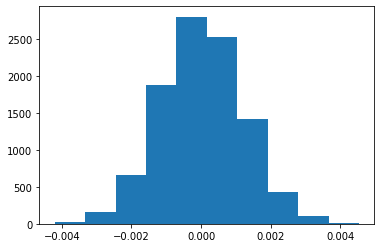

In [41]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [42]:
#divide the 2 groups
df_control = df2.query('group == "control"')
df_treatment = df2.query('group == "treatment"')

# display observed difference
obs_diff = df_treatment.converted.mean() - df_control.converted.mean()
obs_diff

-0.0015782389853555567

Text(0, 0.5, 'Frequency')

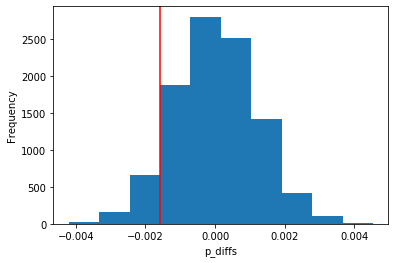

In [43]:
#visualize observed difference
plt.hist(p_diffs)
plt.axvline(x=obs_diff, color='r')
plt.xlabel('p_diffs')
plt.ylabel('Frequency')

In [44]:
#first calculate p-value
(p_diffs > obs_diff).mean()

0.9147

In this case we "fail to reject the null hypothesis" becasue the p-value is **0.9147** which is large number

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [45]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

In [46]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],value=None, alternative='smaller', prop_var=False)

z_score, p_value

(1.3109241984234394, 0.9050583127590245)

The results we got here are almost similar to the results we computed earlier with a **p-value of this test is 0.905** compared to the one we calculated which is **0.9147**. We noticed that both results are so close now we are confident to say "fail to reject the null hypothesis"

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, we will see that the result we achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [47]:
df2['intercept'] = 1
df2[['control','ab_page']]= pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


Using **statsmodels** to instantiate the regression model on the two columns you created in part b., then fit the model using the two columns we created to predict whether or not an individual converts. 

In [48]:
logit = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

Provide the summary of the model below

In [49]:
results = logit.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2020-08-13 13:05 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

According to the null & alternative hypotheses associated in the part II as follows:

**H0: $p_{new}$** - **$p_{old}$** <= 0

**HA: $p_{new}$** - **$p_{old}$** > 0

comparing to this regression part which assume that the null & alternative hypotheses are:

**H0: $p_{new}$** - **$p_{old}$** = 0

**HA: $p_{new}$** - **$p_{old}$** != 0

that's the reason behind ab_page p-value which is 0.189 comparing to the p-value in part II which is 0.903

Now, we are considering other things that might influence whether or not an individual converts.

It is definitely a good practice to consider other factors because they give the regression model more options to have more specific and detailed answers to the questions we are having about a product or service, but everything has a price one of the disadvantages of having more factors cause higher order complexity and Multicollinearity which sometimes affect the model interpretation.

Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. we will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  

Create dummy variables for these country columns

In [50]:
#load the datdset
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [51]:
#cheking the unique values of country
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [52]:
#create dummy varaibles
df_new[['CA','UK', 'US']]= pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


Though we have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model. <br><br>

In [55]:
#Regression regression model
df_new['intercept'] = 1
rg = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'CA']])
results2 = rg.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 13 Aug 2020   Pseudo R-squ.:               2.323e-05
Time:                        13:10:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
==============================================================================
"""

In [56]:
#intrepretations 
print('intercept = ', np.exp(-1.9893))
print('ab_page = ', np.exp(-0.0149))
print('UK = ', np.exp(0.0099))
print('CA = ', np.exp(-0.0408))

intercept =  0.13679114574153073
ab_page =  0.9852104557227469
UK =  1.0099491671175422
CA =  0.9600211149716509


In [58]:
df_new['UK_ab_page'] = df_new['UK']*df_new['ab_page']
df_new['CA_ab_page'] = df_new['CA']*df_new['ab_page']
logit3 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'CA', 'UK_ab_page', 'CA_ab_page']])

results = logit3.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 13 Aug 2020   Pseudo R-squ.:               3.482e-05
Time:                        13:14:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
CA_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
==============================================================================
"""

In [59]:
df.groupby('group').mean()['converted']

group
control      0.120399
treatment    0.118920
Name: converted, dtype: float64

### Summing up
The values we interpreted in this regression model does not show a significant difference from the previous model, in addition to as we saw the conversion rates don't have big difference hence we would accept the null hypothesis.

<a id='conclusions'></a>
## Conclusion
According to the previous A/B test and the Regression models we can say that the old_page was proven that it's better than the new one (We fail to reject the null hypothesis). Notice: these tests have limitations according to the lack of data and factors associated with this case study.